# Play Env Notebook

A Jupyter Notebook to play with the FerryGym environment by keyboard.
Adds examples on how to access the observations and display the observation images.

In [3]:
## Import dependencies
import gym
import pygame
from gym.utils.play import play
import numpy as np
import matplotlib.pyplot as plt


from gym.envs.registration import register
from ferrygym.FerryGymEnv import FerryGymEnv

# render matplotlib inline
%matplotlib inline



path ferrygym ['/Users/raphael/Documents/Arbeit/INS/RL/FerryGym', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym', '/usr/local/opt/python-tk@3.11/libexec', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/ferrygym']


In [4]:
# define environment specific parameters
kwargs = dict(
    generate_training_data=False,
    other_ships=True,
)

# register environment
register(
    id="FerryGym-v0",
    entry_point="FerryGymEnv:FerryGymEnv",
    kwargs=kwargs,
)

# define keyboard mapping
mapping = {(pygame.K_LEFT,): np.array([0,-5]) , (pygame.K_RIGHT,): np.array([0,5]),
           (pygame.K_UP,): np.array([2,0]), (pygame.K_DOWN,): np.array([-2,0])}

env = gym.make('FerryGym-v0')

# save observations for later analysis
observations = []

# callback function to save observations
def callback(obs_t, obs_tp1, action, reward, done, info):
    observations.append(obs_tp1)
    # write observations array to a file if episode is done
    if done:
        print('done')
        import pickle
        with open('observations.pkl', 'wb') as f:
            pickle.dump(observations, f)
    
# start playing
play(env, keys_to_action=mapping, noop=np.array([0,0]), callback=callback)

path ferrygym ['/Users/raphael/Documents/Arbeit/INS/RL/FerryGym', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym', '/usr/local/opt/python-tk@3.11/libexec', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/ferrygym', '/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/ferrygym']
path ferrygym ['/Users/raphael/Documents/Arbeit/INS/RL/FerryGym', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Py

/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/raphael/Documents/Arb

reset called


/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/Users/raphael/Documents/Arbeit/INS/RL/FerryGym/.venv/lib/python3.11/site-packages/gym/utils/passive_env

agent is outside sea
done
saving df:  ./ferrygym/df_2022-04-10 13:00:01+00:00.pkl


error: display Surface quit

In [5]:
# load observations from file
import pickle
with open('observations.pkl', 'rb') as f:
    observations = pickle.load(f)


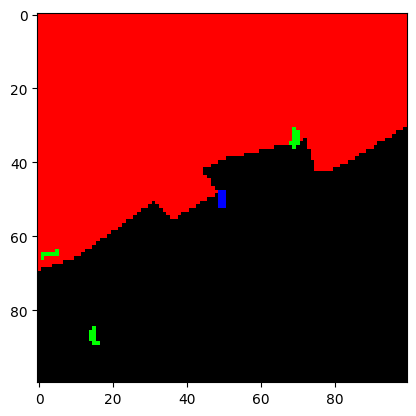

: 

In [10]:
# plot last neighborhood image
neighborhood = observations[-1]['neighborhood']
# allign neighborhood image with the coordinate system (agent facing always up)
neighborhood = np.flip(neighborhood, axis=0)
neighborhood = np.rot90(neighborhood, k=3)
plt.imshow(neighborhood)
plt.show()

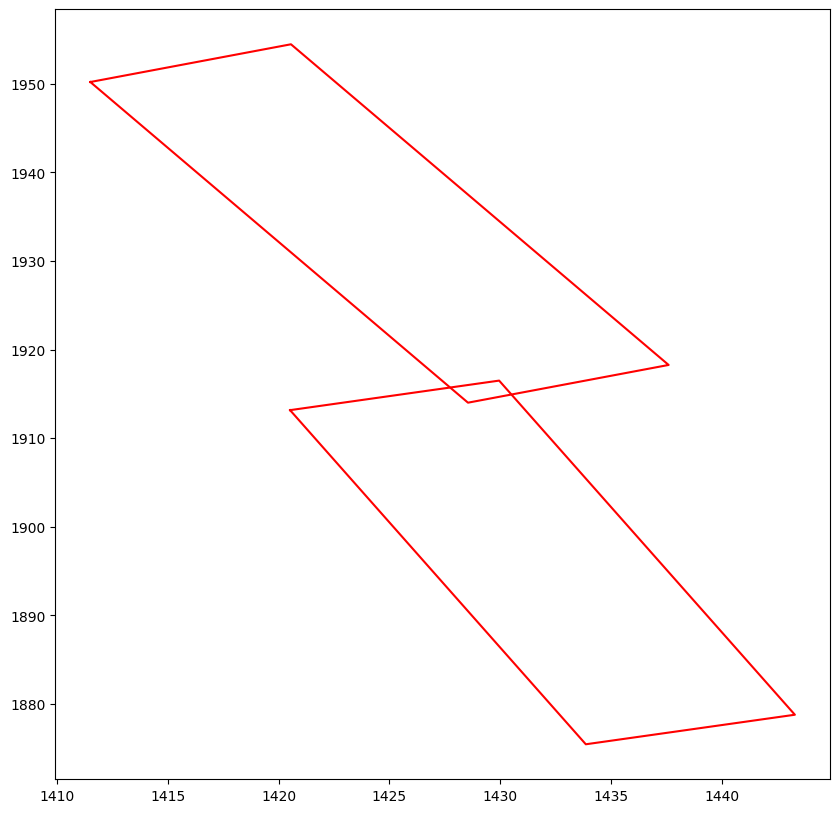

In [5]:
# how to plot ships coordinates
fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(neighborhood)
# shipA
ax.plot([1420.51986543, 1433.85680711, 1443.28457854, 1429.94763686, 1420.51986543],
        [1913.17311937, 1875.46203364, 1878.79626907, 1916.50735479, 1913.17311937],
        color='red')
# shipB
ax.plot([1411.51208263, 1428.54325429, 1437.59152482, 1420.56035316, 1411.51208263],
        [1950.20873898, 1914.01565688, 1918.27344979, 1954.46653189, 1950.20873898],
        color='red')
plt.show()
